In [1]:
# importing relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

import scipy.stats as stat
import matplotlib.mlab as mlab
import seaborn as sns
import sklearn
import statsmodels.api as sm
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import classification_report
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn import model_selection
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [2]:
# reading csv file

data = pd.read_csv("churn_clean.csv")
data.dropna()
print(data.shape)
print(list(data.columns))
data

(10000, 50)
['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# summary statistics of character column
 
data.describe(include=['object'])

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,6058,52,1620,3,25,639,5,...,2,2,2,2,2,2,2,2,2,4
top,A782700,e8df6526-ced7-4e16-9d38-4a0a0594b63e,07a1c05f1a7bf7f61c289c572e7332e2,Houston,TX,Washington,Suburban,America/New_York,Occupational psychologist,Divorced,...,Yes,No,No,No,No,No,No,No,Yes,Electronic Check
freq,1,1,1,34,603,111,3346,4072,30,2092,...,9067,5392,6424,5494,5614,6250,5071,5110,5882,3398


In [5]:
# summary statistics of character column

data.describe(include='all')

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,10000,10000,10000,6058,52,1620,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,A782700,e8df6526-ced7-4e16-9d38-4a0a0594b63e,07a1c05f1a7bf7f61c289c572e7332e2,Houston,TX,Washington,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,1,34,603,111,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,NaN,NaN,NaN,NaN,NaN,NaN,49153.319600,38.757567,-90.782536,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,NaN,NaN,NaN,NaN,NaN,NaN,27532.196108,5.437389,15.156142,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,601.000000,17.966120,-171.688150,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,NaN,NaN,NaN,NaN,NaN,NaN,26292.500000,35.341828,-97.082812,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,NaN,NaN,NaN,NaN,NaN,NaN,48869.500000,39.395800,-87.918800,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,NaN,NaN,NaN,NaN,NaN,NaN,71866.500000,42.106908,-80.088745,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [6]:
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [7]:
data.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [8]:
data.shape

(10000, 50)

In [9]:
data.isna().any()

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

In [10]:
data.dropna()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [11]:
data.fillna(data.mean(), inplace=True)

In [12]:
data.isna()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
data.isna().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [14]:
data.nunique()

CaseOrder               10000
Customer_id             10000
Interaction             10000
UID                     10000
City                     6058
State                      52
County                   1620
Zip                      8583
Lat                      8563
Lng                      8630
Population               5933
Area                        3
TimeZone                   25
Job                       639
Children                   11
Age                        72
Income                   9993
Marital                     5
Gender                      3
Churn                       2
Outage_sec_perweek       9986
Email                      23
Contacts                    8
Yearly_equip_failure        6
Techie                      2
Contract                    3
Port_modem                  2
Tablet                      2
InternetService             3
Phone                       2
Multiple                    2
OnlineSecurity              2
OnlineBackup                2
DeviceProt

<AxesSubplot:>

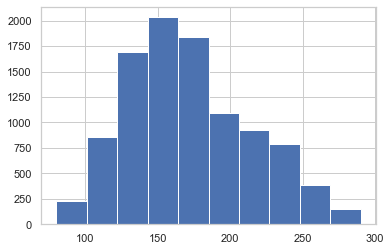

In [15]:
data['MonthlyCharge'].hist()

<AxesSubplot:>

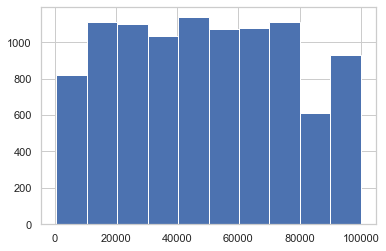

In [16]:
data['Zip'].hist()

<AxesSubplot:>

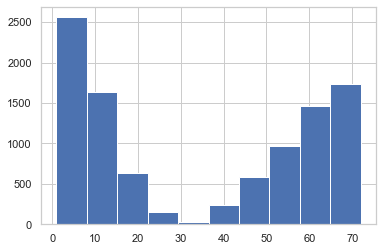

In [17]:
data['Tenure'].hist()

<AxesSubplot:>

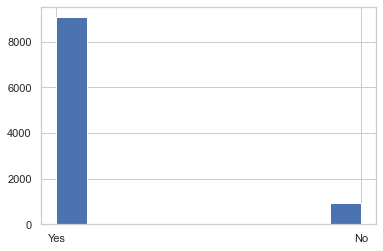

In [18]:
data['Phone'].hist()

<AxesSubplot:>

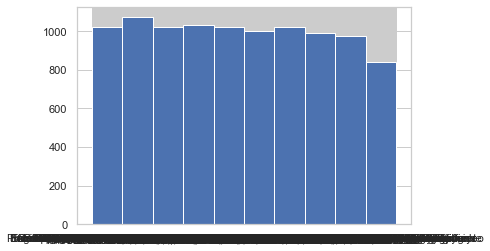

In [19]:
data['Job'].hist()

<AxesSubplot:>

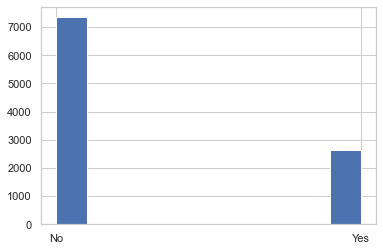

In [20]:
data['Churn'].hist()

<AxesSubplot:>

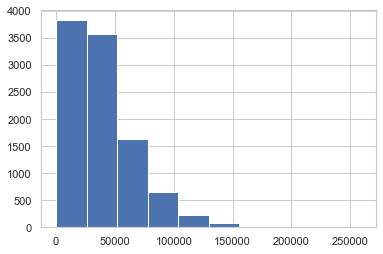

In [21]:
data['Income'].hist()

<AxesSubplot:>

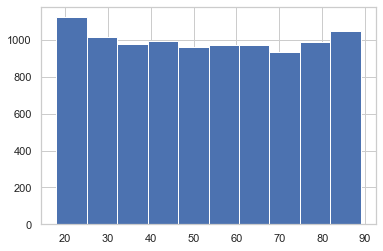

In [22]:
data['Age'].hist()

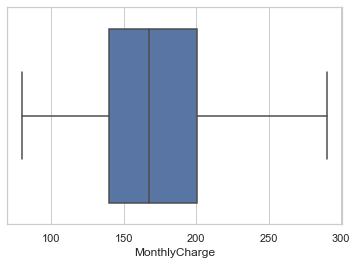

In [23]:
boxplot=sns.boxplot(x='MonthlyCharge',data=data)

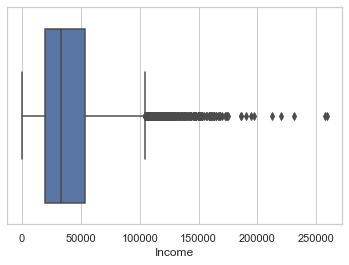

In [24]:
# dictating outliers
boxplot=sns.boxplot(x='Income',data=data)

In [25]:
# Dropping outliers systematically
outlierFilter=data['Income'] < 65000
data = data[outlierFilter]

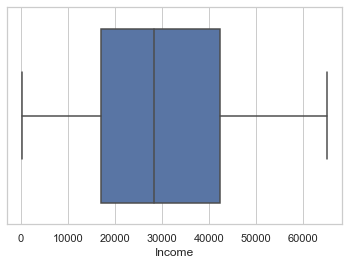

In [26]:
boxplot=sns.boxplot(x='Income',data=data)

In [27]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 8361, dtype: bool

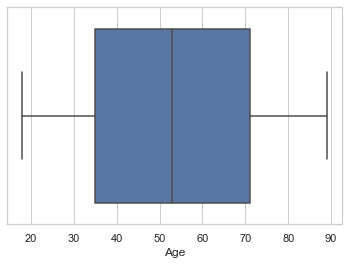

In [28]:
boxplot=sns.boxplot(x='Age',data=data)

In [29]:
groupedInternetService = data.groupby(by="InternetService").size()
groupedInternetService

InternetService
DSL            2859
Fiber Optic    3733
None           1769
dtype: int64

<AxesSubplot:xlabel='InternetService'>

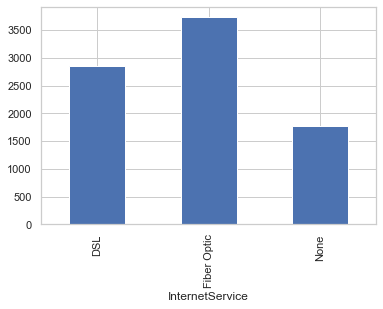

In [30]:
groupedInternetService.plot.bar()

In [31]:
groupedChurn = data.groupby(by="Churn").size()
groupedChurn


Churn
No     6153
Yes    2208
dtype: int64

<AxesSubplot:xlabel='Churn'>

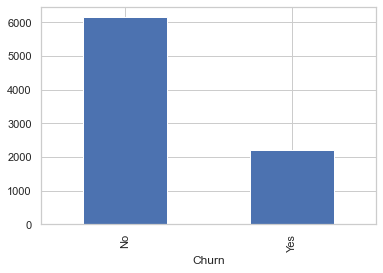

In [32]:
groupedChurn.plot.bar()

In [33]:
groupedOnlineSecurity = data.groupby(by="OnlineSecurity").size()
groupedOnlineSecurity

OnlineSecurity
No     5358
Yes    3003
dtype: int64

<AxesSubplot:xlabel='OnlineSecurity'>

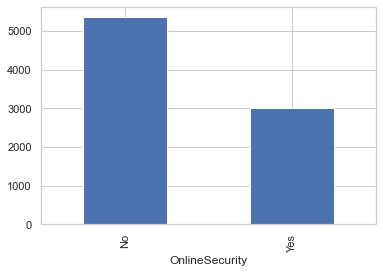

In [34]:
%matplotlib inline
groupedOnlineSecurity.plot.bar()

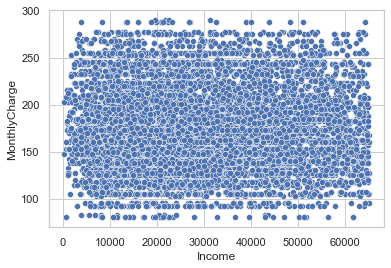

In [35]:
sns.scatterplot(x='Income', y='MonthlyCharge', data=data)
plt.show()

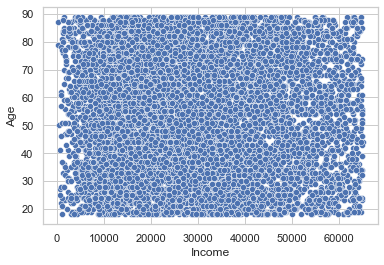

In [36]:
sns.scatterplot(x='Income', y='Age', data=data)
plt.show()

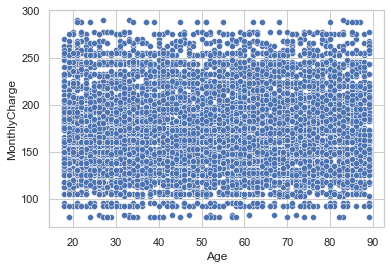

In [37]:
sns.scatterplot(x='Age', y='MonthlyCharge', data=data)
plt.show()

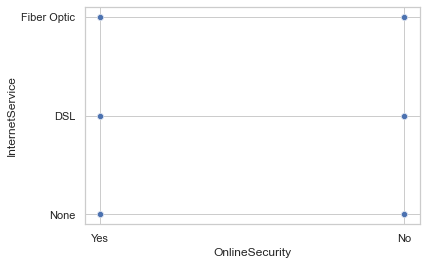

In [38]:
sns.scatterplot(x='OnlineSecurity', y='InternetService', data=data)
plt.show()

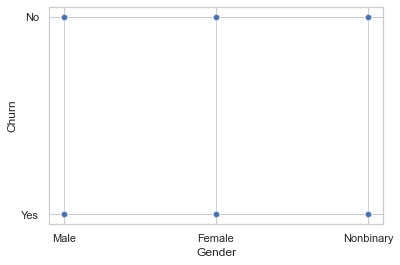

In [39]:
sns.scatterplot(x='Gender', y='Churn', data=data)
plt.show()

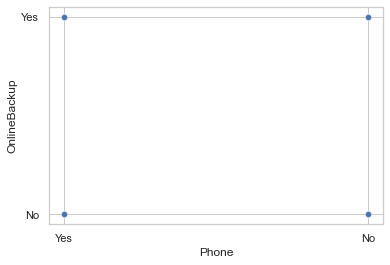

In [40]:
sns.scatterplot(x='Phone', y='OnlineBackup', data=data)
plt.show()

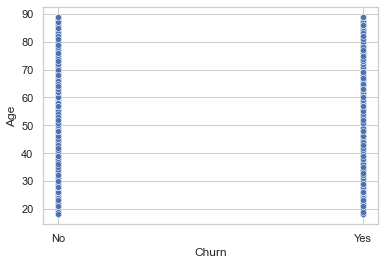

In [41]:
sns.scatterplot(x='Churn', y='Age', data=data)
plt.show()

In [42]:
# Checking for missing values

data.isna().any(axis=0).any()

False

In [43]:
print(data)

      CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef964785f41a2959829830fb8a   West B

In [44]:
# checking how many unique values are in each column

data.nunique()

CaseOrder               8361
Customer_id             8361
Interaction             8361
UID                     8361
City                    5305
State                     52
County                  1559
Zip                     7378
Lat                     7361
Lng                     7407
Population              5282
Area                       3
TimeZone                  25
Job                      639
Children                  11
Age                       72
Income                  8355
Marital                    5
Gender                     3
Churn                      2
Outage_sec_perweek      8353
Email                     23
Contacts                   8
Yearly_equip_failure       6
Techie                     2
Contract                   3
Port_modem                 2
Tablet                     2
InternetService            3
Phone                      2
Multiple                   2
OnlineSecurity             2
OnlineBackup               2
DeviceProtection           2
TechSupport   

In [45]:
# printing columns with more than 100 unique values, these columns will be either numerical or have too many unique values that they should be left out

for col in data.columns:
    if data[col].nunique()>100:
        print(col)

CaseOrder
Customer_id
Interaction
UID
City
County
Zip
Lat
Lng
Population
Job
Income
Outage_sec_perweek
Tenure
MonthlyCharge
Bandwidth_GB_Year


In [46]:
# dropping columns with higher number of of unique values

to_drop = ['City','County','Zip','Job','TimeZone', 'Lat','Lng','UID', 'Customer_id','Interaction','CaseOrder']
data.drop(columns=to_drop,inplace=True)
data.shape

/Users/ibrahimsuleiman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(8361, 39)

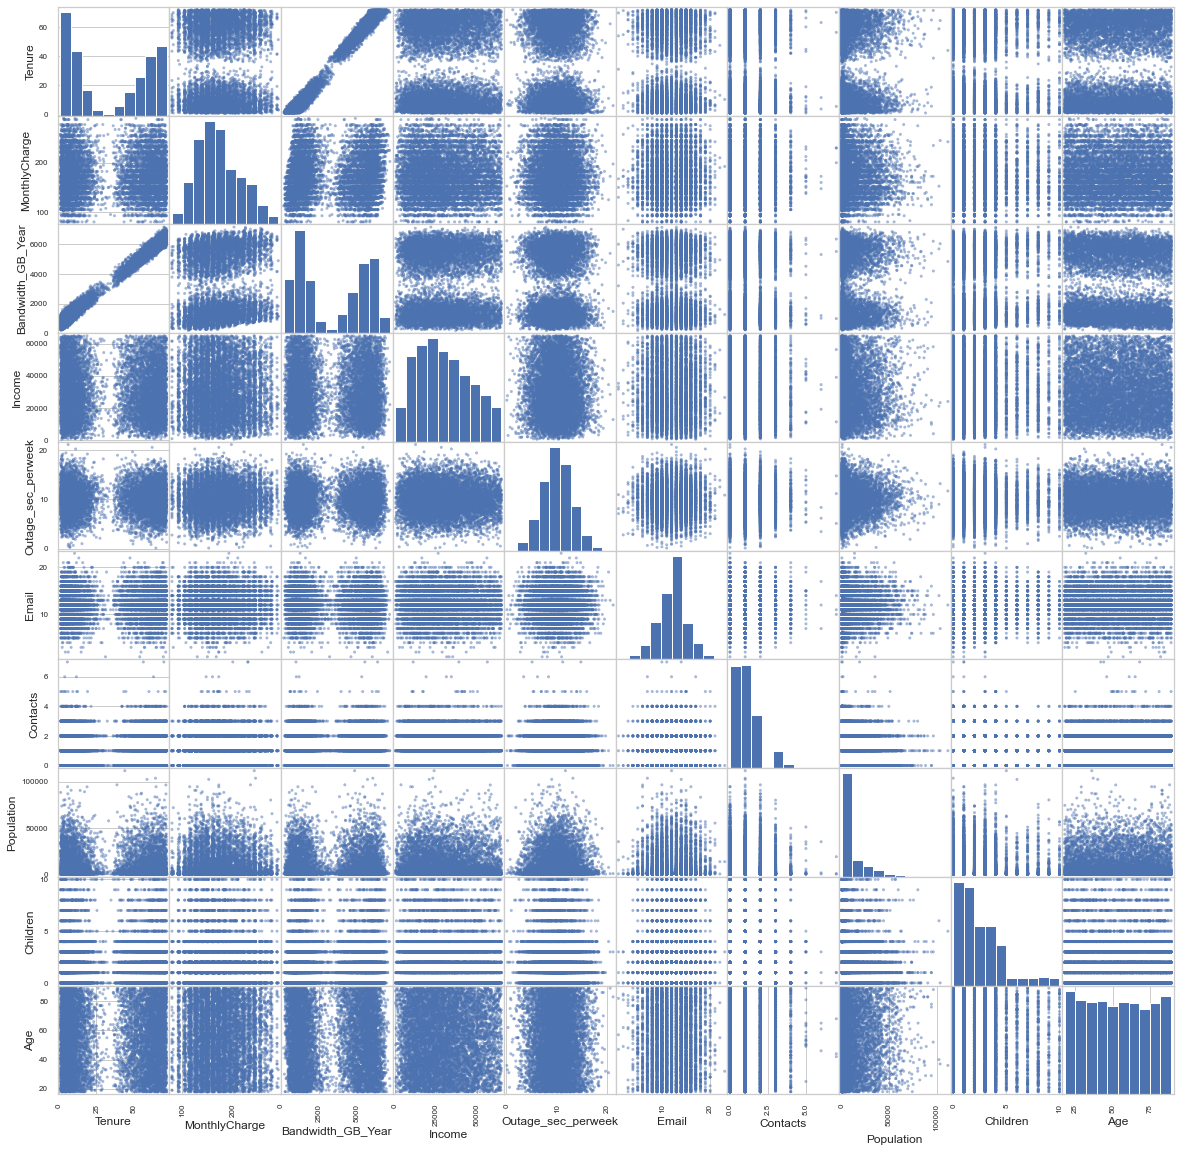

<Figure size 432x288 with 0 Axes>

In [47]:
# plotting scatter plot of each numerical column vs others

pd.plotting.scatter_matrix(data[['Tenure','MonthlyCharge','Bandwidth_GB_Year','Income','Outage_sec_perweek',
           'Email','Contacts','Population','Children','Age']], figsize=(20, 20))
plt.show()
plt.savefig('correlation.png')

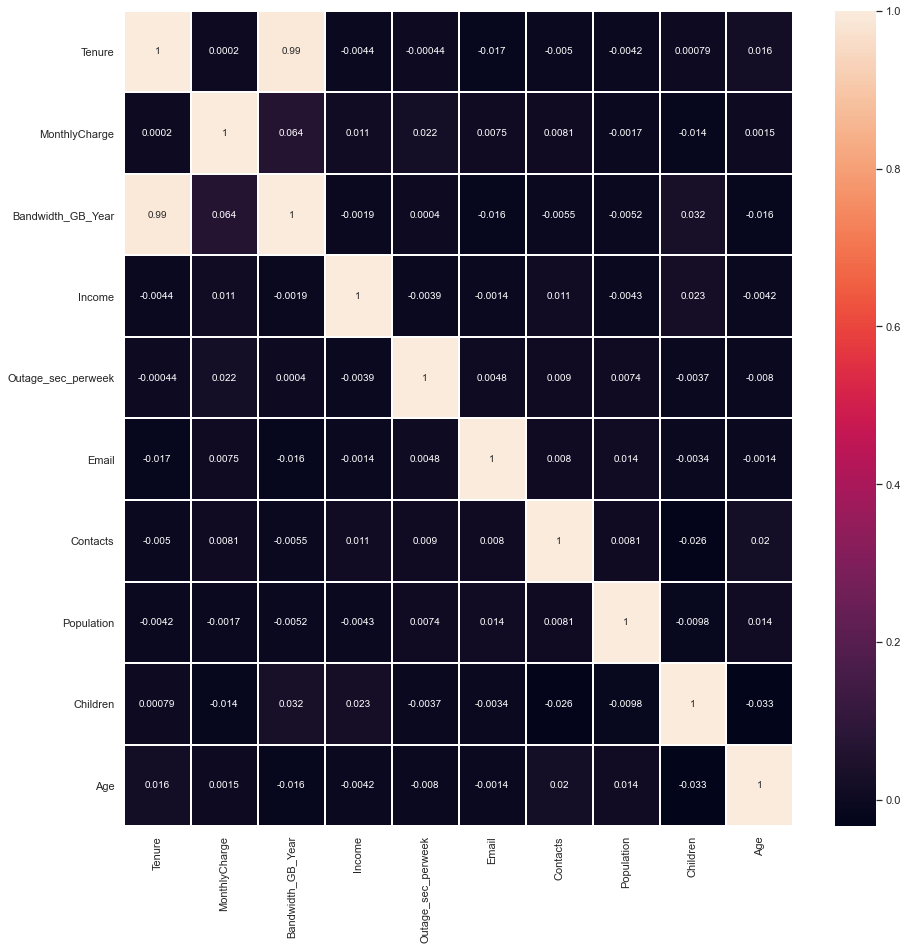

In [48]:
# plotting correlations plot of each numerical column vs others

plt.subplots(figsize=(15,15))
df = data[['Tenure','MonthlyCharge','Bandwidth_GB_Year','Income','Outage_sec_perweek',
           'Email','Contacts','Population','Children','Age']]
sns.heatmap(df.corr(),annot=True,lw=1);

In [49]:
categorical_columns = ['State',
                          'Churn','Area','Marital','Gender','Techie','Contract','Port_modem','Tablet',
                         'InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup',
                          'DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies',
                          'PaperlessBilling','PaymentMethod'
                         ]

numerical_columns = ['Population','Children','Age','Income','Outage_sec_perweek','Email',
                'Contacts','Yearly_equip_failure','Tenure',
                'MonthlyCharge','Bandwidth_GB_Year'
               ]

dummy_data_file_index = 0

In [50]:
def get_dummy_data_with_output(dummy_variable_columns, data):
    global dummy_data_file_index
    dummy_data = pd.get_dummies(data, prefix=dummy_variable_columns, columns=dummy_variable_columns, drop_first= True)
    dummy_data.to_csv('dummy_var_data'+str(dummy_data_file_index)+'.csv', index=False)
    y = dummy_data['MonthlyCharge']
    dummy_data.drop(columns=['MonthlyCharge'], inplace=True)
    dummy_data_file_index += 1
    return y, dummy_data

y, dummy_data = get_dummy_data_with_output(categorical_columns, data)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(dummy_data,y,test_size=.2, random_state=0)

In [52]:
dummy_data

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,Bandwidth_GB_Year,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,904.536110,...,1,1,0,0,0,1,1,1,0,0
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,800.982766,...,1,0,0,0,1,1,1,0,0,0
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,2054.706961,...,0,0,0,0,0,1,1,1,0,0
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,2164.579412,...,1,0,0,0,1,0,1,0,0,1
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,271.493436,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,3,23,55723.74,9.415935,12,2,0,68.197130,6511.252601,...,0,1,1,0,0,0,0,0,1,0
9996,77168,4,48,34129.34,6.740547,15,2,0,61.040370,5695.951810,...,1,1,1,0,1,0,0,0,1,0
9997,406,1,48,45983.43,6.590911,10,0,0,47.416890,4159.305799,...,1,1,0,0,0,0,1,0,0,0
9998,35575,1,39,16667.58,12.071910,14,1,0,71.095600,6468.456752,...,0,0,0,1,1,1,1,1,0,0


In [53]:
dummy_data.dtypes

Population                                 int64
Children                                   int64
Age                                        int64
Income                                   float64
Outage_sec_perweek                       float64
                                          ...   
StreamingMovies_Yes                        uint8
PaperlessBilling_Yes                       uint8
PaymentMethod_Credit Card (automatic)      uint8
PaymentMethod_Electronic Check             uint8
PaymentMethod_Mailed Check                 uint8
Length: 97, dtype: object

In [54]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8361 entries, 0 to 9999
Data columns (total 97 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             8361 non-null   int64  
 1   Children                               8361 non-null   int64  
 2   Age                                    8361 non-null   int64  
 3   Income                                 8361 non-null   float64
 4   Outage_sec_perweek                     8361 non-null   float64
 5   Email                                  8361 non-null   int64  
 6   Contacts                               8361 non-null   int64  
 7   Yearly_equip_failure                   8361 non-null   int64  
 8   Tenure                                 8361 non-null   float64
 9   Bandwidth_GB_Year                      8361 non-null   float64
 10  Item1                                  8361 non-null   int64  
 11  Item

In [55]:
# Extract Clean dataset
data.to_csv('churn_prepared.csv')

In [57]:
#importing relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

import scipy.stats as stat
import matplotlib.mlab as mlab
import seaborn as sns
import sklearn
import statsmodels.api as sm
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import classification_report
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn import model_selection
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline


data = pd.read_csv('churn_prepared.csv')
data = data.columns
print(data)

Index(['Unnamed: 0', 'State', 'Population', 'Area', 'Children', 'Age',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3',
       'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')


In [102]:
# Creating a function to create prediction model based on statsmodel library and
# print details like model Summary, Confusion Matrix and Accuracy Score based on predicted values using test set
figsize=(8,5)

def get_sm_model(y_train,X_train, X_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    model=sm.OLS(y_train,X_train)
    model=model.fit()
    print(model.summary())
    y_hat = model.predict(X_test)
    arr = np.c_[y_hat, y_test]
    print('\nPrinting predicted and actual values:\n',arr)
    print('\nPrinting Mean Squared Error:\n',(np.sqrt(mean_squared_error(y_test, y_hat))))
    print('\nR2 Score:\n',r2_score(y_test, y_hat))
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test,x=y_hat, ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Test",fontsize=15)
    plt.show()
    return model, arr

In [103]:
# Creating a function to create prediction model based on sklearn library and
# print details like model Summary, Confusion Matrix and Accuracy Score based on predicted values using test set

def get_sk_model(y_train,X_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    arr = np.c_[X_train.columns.tolist(),model.coef_]
    intercept = model.intercept_
    print('\nPrinting model coefficients and intercept summary for sklearn model:\n',arr, model.intercept_)
    y_pred = model.predict(X_test)
    print('\nPrinting predicted and actual values from sklearn:\n',np.c_[y_pred, y_test])
    print('\nPrinting Mean Squared Error from sklearn:\n',(np.sqrt(mean_squared_error(y_test, y_pred))))
    print('\nR2 Score  from sklearn:\n',r2_score(y_test, y_pred))
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test,x=y_pred,color="g", ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Test",fontsize=15)
    plt.show()
    
    #plt.scatter(y_pred,y_test-y_pred)
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_pred,y=y_test-y_pred,color="red", ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Residual",fontsize=15)
    plt.show()
    return model, arr, intercept

In [68]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyCharge   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.513e+04
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:39:57   Log-Likelihood:                -16534.
No. Observations:                6688   AIC:                         3.326e+04
Df Residuals:                    6590   BIC:                         3.393e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                   -88.5308      0.936    -94.624      0.000     -90.365     -86.697
Population                            -2.153e-06   2.64e-06     -0.815      0.415   -7.33e-06    3.03e-06
Children                                 -9.5041      0.044   -214.283      0.000      -9.591      -9.417
Age                                       1.0113      0.005    215.430      0.000       1.002       1.020
Income                                 -2.74e-06   2.22e-06     -1.233      0.218    -7.1e-06    1.62e-06
Outage_sec_perweek                        0.0006      0.012      0.048      0.962      -0.023       0.024
Email                                    -0.0049      0.012     -0.420      0.674      -0.028       0.018
Contacts                                 -0.0145      0.036     -0.398      0.690      -0.086       0.057
Yearly_equip_failure                     -0.0200      0.056     -0.357      0.721      -0.130       0.090
Tenure                                  -25.3230      0.110   -231.112      0.000     -25.538     -25.108
Bandwidth_GB_Year                         0.3091      0.001    231.412      0.000       0.306       0.312
Item1                                     0.0117      0.051      0.229      0.819      -0.088       0.112
Item2                                    -0.0144      0.048     -0.300      0.764      -0.108       0.080
Item3                                     0.0845      0.043      1.943      0.052      -0.001       0.170
Item4                                    -0.0085      0.039     -0.217      0.828      -0.085       0.068
Item5                                    -0.0314      0.040     -0.778      0.436      -0.111       0.048
Item6                                    -0.0455      0.041     -1.096      0.273      -0.127       0.036
Item7                                    -0.0423      0.039     -1.077      0.282      -0.119       0.035
Item8                                     0.0198      0.038      0.524      0.600      -0.054       0.094
State_AL                                  0.5828      0.465      1.252      0.210      -0.329       1.495
State_AR                                  0.5642      0.465      1.213      0.225      -0.347       1.476
State_AZ                                  0.4965      0.513      0.968      0.333      -0.509       1.502
State_CA                                  0.5468      0.417      1.311      0.190      -0.271       1.364
State_CO                                  0.2454      0.477      0.515      0.607      -0.689       1.180
State_CT                                  0.1778      0.579      0.307      0.759      -0.956       1.312
State_DC                                 -0.2324      0.994     -0.234      0.815      -2.180       1.715
State_DE 

In [73]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Bandwidth_GB_Year,8647.45
8,Tenure,6791.40
83,InternetService_Fiber Optic,41.92
10,Item1,27.70
11,Item2,24.63
...,...,...
78,Techie_Yes,1.23
57,State_RI,1.21
25,State_DE,1.19
24,State_DC,1.15


In [76]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('Phone_Yes', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.529e+04
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:02:05   Log-Likelihood:                -16534.
No. Observations:                6688   AIC:                         3.326e+04
Df Residuals:                    6591   BIC:                         3.392e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [77]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Bandwidth_GB_Year,8473.04
8,Tenure,6654.38
83,InternetService_Fiber Optic,41.08
10,Item1,27.68
11,Item2,24.60
...,...,...
78,Techie_Yes,1.23
57,State_RI,1.21
25,State_DE,1.19
24,State_DC,1.15


In [78]:
X = X.drop('Bandwidth_GB_Year', 1)
# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1631.
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:05:55   Log-Likelihood:                -23928.
No. Observations:                6688   AIC:                         4.805e+04
Df Residuals:                    6592   BIC:                         4.870e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [79]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Item1,27.67
10,Item2,24.56
11,Item3,19.97
14,Item6,18.05
15,Item7,16.17
...,...,...
77,Techie_Yes,1.22
56,State_RI,1.15
24,State_DE,1.12
23,State_DC,1.10


/Users/ibrahimsuleiman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

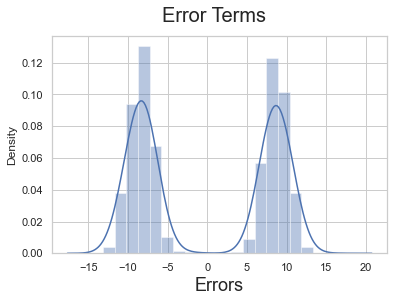

In [101]:
import seaborn as sns
y_train_MonthlyCharge = lr_3.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_MonthlyCharge), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.513e+04
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:17:54   Log-Likelihood:                -16534.
No. Observations:                6688   AIC:                         3.326e+04
Df Residuals:                    6590   BIC:                         3.393e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

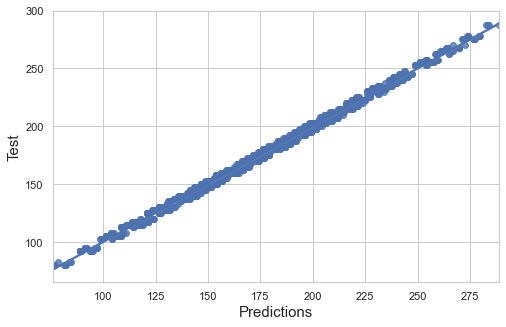

In [94]:
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test);


Printing model coefficients and intercept summary for sklearn model:
 [['Population' '-2.153182405862952e-06']
 ['Children' '-9.504096471790422']
 ['Age' '1.0112631291249938']
 ['Income' '-2.7396462581319447e-06']
 ['Outage_sec_perweek' '0.0005795370844861036']
 ['Email' '-0.004934941242035973']
 ['Contacts' '-0.014463754502802573']
 ['Yearly_equip_failure' '-0.019971665271357963']
 ['Tenure' '-25.32297801095001']
 ['Bandwidth_GB_Year' '0.3091069901465211']
 ['Item1' '0.01171213140077354']
 ['Item2' '-0.014385136442962576']
 ['Item3' '0.08448471574173144']
 ['Item4' '-0.00845659782285324']
 ['Item5' '-0.031406485215735414']
 ['Item6' '-0.04546679525014374']
 ['Item7' '-0.04234915298472264']
 ['Item8' '0.019830098833552245']
 ['State_AL' '0.5828068321125064']
 ['State_AR' '0.5642121136533118']
 ['State_AZ' '0.49648769428750483']
 ['State_CA' '0.5467815258442208']
 ['State_CO' '0.2453589494108886']
 ['State_CT' '0.1777650068137387']
 ['State_DC' '-0.23240231885856352']
 ['State_DE' '0.2

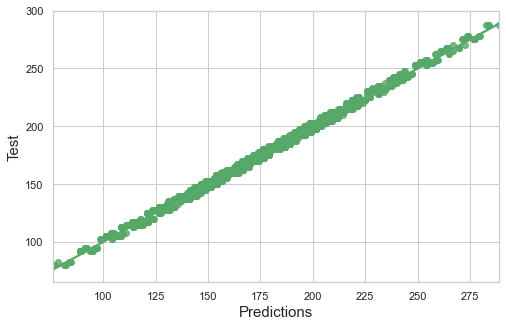

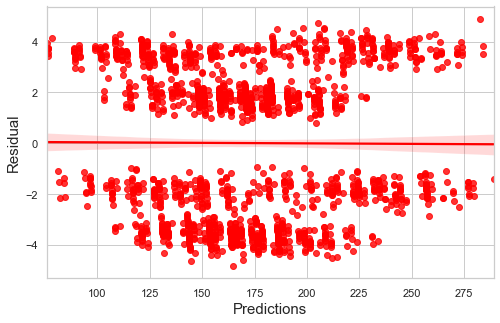

In [93]:
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test);

In [97]:
equation = 'y = '
for ar in arr:
    eq = str(round(float(ar[1]),3))+' x '+str(ar[0])
    if eq.startswith('-'):
        equation = equation + ' ' + eq
    else:
        equation = equation + ' + ' +eq
    
print (equation + ' ' + str(intercept))

y =  -0.0 x Population -9.504 x Children + 1.011 x Age -0.0 x Income + 0.001 x Outage_sec_perweek -0.005 x Email -0.014 x Contacts -0.02 x Yearly_equip_failure -25.323 x Tenure + 0.309 x Bandwidth_GB_Year + 0.012 x Item1 -0.014 x Item2 + 0.084 x Item3 -0.008 x Item4 -0.031 x Item5 -0.045 x Item6 -0.042 x Item7 + 0.02 x Item8 + 0.583 x State_AL + 0.564 x State_AR + 0.496 x State_AZ + 0.547 x State_CA + 0.245 x State_CO + 0.178 x State_CT -0.232 x State_DC + 0.246 x State_DE + 0.432 x State_FL + 0.132 x State_GA -0.037 x State_HI + 0.43 x State_IA + 0.215 x State_ID + 0.532 x State_IL + 0.533 x State_IN + 0.53 x State_KS + 0.617 x State_KY + 0.25 x State_LA + 0.592 x State_MA + 0.055 x State_MD + 0.267 x State_ME + 0.827 x State_MI + 0.512 x State_MN + 0.86 x State_MO + 0.581 x State_MS + 1.068 x State_MT + 0.465 x State_NC + 0.907 x State_ND + 0.36 x State_NE + 1.155 x State_NH + 0.387 x State_NJ + 0.233 x State_NM + 0.344 x State_NV + 0.41 x State_NY + 0.477 x State_OH + 0.411 x State_